In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


DATA_PATH = "./data/Polymer Tg SMILES.xlsx"

data = pd.read_excel(DATA_PATH)
data

,No,Polymer ID,Nama Polimer,SMILES,Tg
0,1,P010001,polyethylene,*C*,-120
1,2,P010002,polypropylene,*CC(C)*,0
2,3,P010003,polybutene,*CC(CC)*,-24
3,4,P010004,poly(pent-1-ene),CCCC(C*)*,-40
4,5,P010008,poly(4-methylpent-1-ene),*CC(CC(C)C)*,30
...,...,...,...,...,...
1435,1436,P522008,"poly(2,2,3,3,4,4,4-heptafluorobutyl 2-fluoroac...",*CC(C(=O)OCC(C(C(F)(F)F)(F)F)(F)F)(F)*,75
1436,1437,P522009,"poly(2,2,3,3,4,4,5,5,5-nonafluoropentyl 2-fluo...",*CC(C(=O)OCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,63
1437,1438,P522016,"poly(3,3,4,4,5,5,6,6,6-nonafluorohexyl 2-fluor...",*CC(C(=O)OCCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,6
1438,1439,P522017,"poly(3,3,4,4,5,5,6,6,7,7,8,8,8-tridecafluorooc...",*CC(C(=O)OCCC(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)...,53


In [3]:
data = data[data["Tg"] != "9,000,00"].copy()
data.reset_index(drop=True, inplace=True)

In [4]:
data["Tg"] = data["Tg"].astype(float)
data["Tg"].describe()

count    1433.00000
mean       85.59187
std        88.82163
min      -139.00000
25%        35.00000
50%        75.00000
75%       130.00000
max       420.00000
Name: Tg, dtype: float64

In [5]:
data["SMILES"].apply(lambda x: len(x)).describe()

count    1439.000000
mean       48.234190
std        27.807956
min         3.000000
25%        28.000000
50%        43.000000
75%        64.000000
max       170.000000
Name: SMILES, dtype: float64

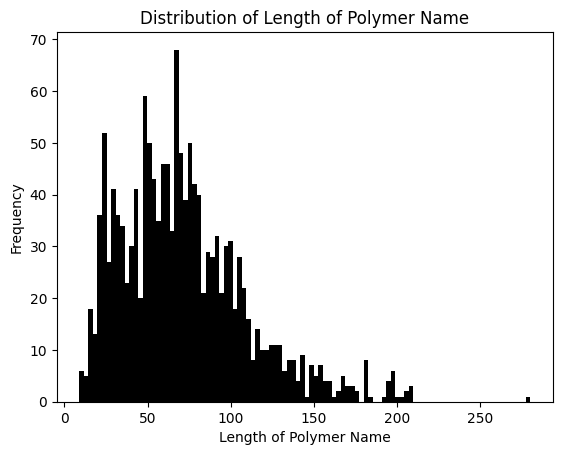

In [6]:
polimer_name_length = data["Nama Polimer"].apply(lambda x: len(x))
polimer_name_length.hist(bins=100, color="#000")
plt.xlabel("Length of Polymer Name")
plt.ylabel("Frequency")
plt.title("Distribution of Length of Polymer Name")
plt.grid(alpha=0)
plt.show()

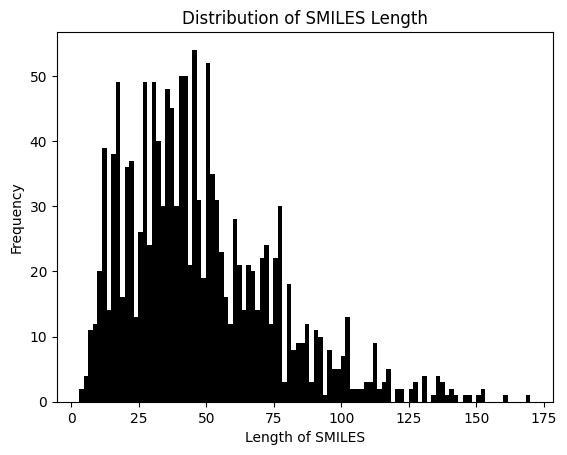

In [7]:
smiles_length = data["SMILES"].apply(lambda x: len(x))
smiles_length.hist(bins=100, color="#000")
plt.xlabel("Length of SMILES")
plt.ylabel("Frequency")
plt.title("Distribution of SMILES Length")
plt.grid(alpha=0)
plt.show()

In [8]:
data["SMILES"]

0                                                     *C*
1                                                 *CC(C)*
2                                                *CC(CC)*
3                                               CCCC(C*)*
4                                            *CC(CC(C)C)*
                              ...                        
1434               *CC(C(=O)OCC(C(C(F)(F)F)(F)F)(F)F)(F)*
1435        *CC(C(=O)OCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*
1436       *CC(C(=O)OCCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*
1437    *CC(C(=O)OCCC(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)...
1438    *CC(C(=O)OCCC(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)...
Name: SMILES, Length: 1439, dtype: object

In [9]:
import torch
import torch.nn as nn
import pandas as pd

# Sample SMILES data
smiles_list = data["SMILES"].tolist()

# Step 1: Build the character lexicon
unique_chars = sorted(set("".join(smiles_list)))  # Extract unique characters
char_to_index = {
    char: idx + 1 for idx, char in enumerate(unique_chars)
}  # Assign index (1-based)
char_to_index["<PAD>"] = 0  # Padding index

# Step 2: Define the character length constraint
MAX_SMILES_LENGTH = 200  # As stated in the paper

# Encode SMILES strings with truncation and padding
encoded_smiles = []
for smiles in smiles_list:
    encoded = [
        char_to_index[char] for char in smiles[:MAX_SMILES_LENGTH]
    ]  # Truncate if too long
    encoded += [0] * (MAX_SMILES_LENGTH - len(encoded))  # Pad if too short
    encoded_smiles.append(encoded)

# Convert to tensor
smiles_tensor = torch.tensor(encoded_smiles, dtype=torch.long)

# Step 3: Define Character Embedding Layer
embedding_dim = 10  # Choose embedding size
embedding_layer = nn.Embedding(len(char_to_index), embedding_dim)

# Step 4: Convert SMILES sequences to embeddings
smiles_embeddings = embedding_layer(smiles_tensor)

# Print encoded sequences and embeddings
print("Encoded SMILES Sequences:\n", smiles_tensor)
print(
    "\nCharacter Embeddings Shape:\n", smiles_embeddings.shape
)  # (num_SMILES, 200, embedding_dim)

Encoded SMILES Sequences:
 tensor([[ 5, 21,  5,  ...,  0,  0,  0],
        [ 5, 21, 21,  ...,  0,  0,  0],
        [ 5, 21, 21,  ...,  0,  0,  0],
        ...,
        [ 5, 21, 21,  ...,  0,  0,  0],
        [ 5, 21, 21,  ...,  0,  0,  0],
        [ 5, 21, 21,  ...,  0,  0,  0]])

Character Embeddings Shape:
 torch.Size([1439, 200, 10])


In [11]:
# Step 1: Reduce Embedding Dimension (10) to 1 by averaging across axis=2
smiles_2d = smiles_embeddings.mean(dim=2)  # Shape: (7, 200)

# Step 2: Convert to Pandas DataFrame for ML
df_features = pd.DataFrame(smiles_2d.detach().numpy())
df_features.columns = [f"char_{i}" for i in range(200)]  # Naming features as char_0, char_1, ..., char_199


In [ ]:
# nrows = data.shape[0]
# print(f"Number of rows: {nrows}")
# smiles_2d = smiles_embeddings.view(nrows, -1)  # Flatten last two dimensions


# df_features = pd.DataFrame(smiles_2d.detach().numpy())  # Convert to NumPy array first
# df_features.columns = [
#     # Name columns f_0, f_1, ...
#     f"f_{i}"
#     for i in range(df_features.shape[1])
# ]
# df_features

Number of rows: 1439


,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_1990,f_1991,f_1992,f_1993,f_1994,f_1995,f_1996,f_1997,f_1998,f_1999
0,0.879317,1.372423,-1.139790,-0.223912,0.172534,-1.153104,-0.615232,-0.525478,-0.370408,-0.955250,...,1.20206,-0.799705,1.826564,-1.556838,-1.378439,2.4744,-1.26907,-2.552367,-0.483037,0.549588
1,0.879317,1.372423,-1.139790,-0.223912,0.172534,-1.153104,-0.615232,-0.525478,-0.370408,-0.955250,...,1.20206,-0.799705,1.826564,-1.556838,-1.378439,2.4744,-1.26907,-2.552367,-0.483037,0.549588
2,0.879317,1.372423,-1.139790,-0.223912,0.172534,-1.153104,-0.615232,-0.525478,-0.370408,-0.955250,...,1.20206,-0.799705,1.826564,-1.556838,-1.378439,2.4744,-1.26907,-2.552367,-0.483037,0.549588
3,0.597800,0.923997,2.098642,-1.853590,-0.972444,0.628131,1.076975,-0.096931,-0.207156,1.666467,...,1.20206,-0.799705,1.826564,-1.556838,-1.378439,2.4744,-1.26907,-2.552367,-0.483037,0.549588
4,0.879317,1.372423,-1.139790,-0.223912,0.172534,-1.153104,-0.615232,-0.525478,-0.370408,-0.955250,...,1.20206,-0.799705,1.826564,-1.556838,-1.378439,2.4744,-1.26907,-2.552367,-0.483037,0.549588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,0.879317,1.372423,-1.139790,-0.223912,0.172534,-1.153104,-0.615232,-0.525478,-0.370408,-0.955250,...,1.20206,-0.799705,1.826564,-1.556838,-1.378439,2.4744,-1.26907,-2.552367,-0.483037,0.549588
1435,0.879317,1.372423,-1.139790,-0.223912,0.172534,-1.153104,-0.615232,-0.525478,-0.370408,-0.955250,...,1.20206,-0.799705,1.826564,-1.556838,-1.378439,2.4744,-1.26907,-2.552367,-0.483037,0.549588
1436,0.879317,1.372423,-1.139790,-0.223912,0.172534,-1.153104,-0.615232,-0.525478,-0.370408,-0.955250,...,1.20206,-0.799705,1.826564,-1.556838,-1.378439,2.4744,-1.26907,-2.552367,-0.483037,0.549588
1437,0.879317,1.372423,-1.139790,-0.223912,0.172534,-1.153104,-0.615232,-0.525478,-0.370408,-0.955250,...,1.20206,-0.799705,1.826564,-1.556838,-1.378439,2.4744,-1.26907,-2.552367,-0.483037,0.549588


In [12]:
processed_data = pd.concat([data, df_features], axis=1)
processed_data

,No,Polymer ID,Nama Polimer,SMILES,Tg,char_0,char_1,char_2,char_3,char_4,...,char_190,char_191,char_192,char_193,char_194,char_195,char_196,char_197,char_198,char_199
0,1,P010001,polyethylene,*C*,-120.0,-0.055564,-0.137339,-0.055564,-0.112419,-0.112419,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
1,2,P010002,polypropylene,*CC(C)*,0.0,-0.055564,-0.137339,-0.137339,0.247824,-0.137339,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
2,3,P010003,polybutene,*CC(CC)*,-24.0,-0.055564,-0.137339,-0.137339,0.247824,-0.137339,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
3,4,P010004,poly(pent-1-ene),CCCC(C*)*,-40.0,-0.137339,-0.137339,-0.137339,-0.137339,0.247824,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
4,5,P010008,poly(4-methylpent-1-ene),*CC(CC(C)C)*,30.0,-0.055564,-0.137339,-0.137339,0.247824,-0.137339,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,1436,P522008,"poly(2,2,3,3,4,4,4-heptafluorobutyl 2-fluoroac...",*CC(C(=O)OCC(C(C(F)(F)F)(F)F)(F)F)(F)*,75.0,-0.055564,-0.137339,-0.137339,0.247824,-0.137339,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
1435,1437,P522009,"poly(2,2,3,3,4,4,5,5,5-nonafluoropentyl 2-fluo...",*CC(C(=O)OCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,63.0,-0.055564,-0.137339,-0.137339,0.247824,-0.137339,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
1436,1438,P522016,"poly(3,3,4,4,5,5,6,6,6-nonafluorohexyl 2-fluor...",*CC(C(=O)OCCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,6.0,-0.055564,-0.137339,-0.137339,0.247824,-0.137339,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
1437,1439,P522017,"poly(3,3,4,4,5,5,6,6,7,7,8,8,8-tridecafluorooc...",*CC(C(=O)OCCC(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)...,53.0,-0.055564,-0.137339,-0.137339,0.247824,-0.137339,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419


In [13]:
processed_data = processed_data.dropna(subset=["Tg"])
processed_data.reset_index(drop=True, inplace=True)
processed_data

,No,Polymer ID,Nama Polimer,SMILES,Tg,char_0,char_1,char_2,char_3,char_4,...,char_190,char_191,char_192,char_193,char_194,char_195,char_196,char_197,char_198,char_199
0,1,P010001,polyethylene,*C*,-120.0,-0.055564,-0.137339,-0.055564,-0.112419,-0.112419,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
1,2,P010002,polypropylene,*CC(C)*,0.0,-0.055564,-0.137339,-0.137339,0.247824,-0.137339,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
2,3,P010003,polybutene,*CC(CC)*,-24.0,-0.055564,-0.137339,-0.137339,0.247824,-0.137339,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
3,4,P010004,poly(pent-1-ene),CCCC(C*)*,-40.0,-0.137339,-0.137339,-0.137339,-0.137339,0.247824,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
4,5,P010008,poly(4-methylpent-1-ene),*CC(CC(C)C)*,30.0,-0.055564,-0.137339,-0.137339,0.247824,-0.137339,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1436,P522008,"poly(2,2,3,3,4,4,4-heptafluorobutyl 2-fluoroac...",*CC(C(=O)OCC(C(C(F)(F)F)(F)F)(F)F)(F)*,75.0,-0.055564,-0.137339,-0.137339,0.247824,-0.137339,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
1429,1437,P522009,"poly(2,2,3,3,4,4,5,5,5-nonafluoropentyl 2-fluo...",*CC(C(=O)OCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,63.0,-0.055564,-0.137339,-0.137339,0.247824,-0.137339,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
1430,1438,P522016,"poly(3,3,4,4,5,5,6,6,6-nonafluorohexyl 2-fluor...",*CC(C(=O)OCCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,6.0,-0.055564,-0.137339,-0.137339,0.247824,-0.137339,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
1431,1439,P522017,"poly(3,3,4,4,5,5,6,6,7,7,8,8,8-tridecafluorooc...",*CC(C(=O)OCCC(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)...,53.0,-0.055564,-0.137339,-0.137339,0.247824,-0.137339,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419


In [14]:
X = processed_data.drop(columns=["No", "Polymer ID", "Nama Polimer", "SMILES", "Tg"])
X

,char_0,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,...,char_190,char_191,char_192,char_193,char_194,char_195,char_196,char_197,char_198,char_199
0,-0.055564,-0.137339,-0.055564,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
1,-0.055564,-0.137339,-0.137339,0.247824,-0.137339,-0.240354,-0.055564,-0.112419,-0.112419,-0.112419,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
2,-0.055564,-0.137339,-0.137339,0.247824,-0.137339,-0.137339,-0.240354,-0.055564,-0.112419,-0.112419,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
3,-0.137339,-0.137339,-0.137339,-0.137339,0.247824,-0.137339,-0.055564,-0.240354,-0.055564,-0.112419,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
4,-0.055564,-0.137339,-0.137339,0.247824,-0.137339,-0.137339,0.247824,-0.137339,-0.240354,-0.137339,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,-0.055564,-0.137339,-0.137339,0.247824,-0.137339,0.247824,0.543407,-0.481484,-0.240354,-0.481484,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
1429,-0.055564,-0.137339,-0.137339,0.247824,-0.137339,0.247824,0.543407,-0.481484,-0.240354,-0.481484,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
1430,-0.055564,-0.137339,-0.137339,0.247824,-0.137339,0.247824,0.543407,-0.481484,-0.240354,-0.481484,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419
1431,-0.055564,-0.137339,-0.137339,0.247824,-0.137339,0.247824,0.543407,-0.481484,-0.240354,-0.481484,...,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419,-0.112419


In [15]:
y = processed_data["Tg"]
y

0      -120.0
1         0.0
2       -24.0
3       -40.0
4        30.0
        ...  
1428     75.0
1429     63.0
1430      6.0
1431     53.0
1432     53.0
Name: Tg, Length: 1433, dtype: float64

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assume X and y are already defined as DataFrames
# X: Feature matrix (SMILES embeddings, shape: (1433, 2000))
# y: Target values (Tg)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define the RandomForest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    max_depth=10,  # Limit tree depth to prevent overfitting
    random_state=42,
    n_jobs=-1,  # Use all available cores for parallel training
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

cv_scores = cross_val_score(rf_model, X, y, cv=10, scoring="r2", n_jobs=-1)
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R² Score: {cv_scores.mean():.4f}")

Mean Absolute Error (MAE): 52.50
Mean Squared Error (MSE): 5519.53
R² Score: 0.2728
Cross-Validation R² Scores: [ 0.16416733 -0.16691513  0.26781474  0.08301824  0.32138856]
Mean CV R² Score: 0.1339


In [17]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming X (feature dataframe) and y (target values) are already defined
X = X.copy()  # Avoid modifying original data
y = y.copy()

# Split dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Try using PCA to reduce dimensionality
pca = PCA(n_components=100)  # Reduce from 2000 to 100 components

# Define pipeline with StandardScaler (optional) & PCA
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),  # Comment this line to test without scaling
        ("pca", pca),
        (
            "model",
            RandomForestRegressor(n_estimators=300, max_depth=30, random_state=42),
        ),
    ]
)

# Train model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=10, scoring="r2", n_jobs=-1)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R² Score: {np.mean(cv_scores):.4f}")

Mean Absolute Error (MAE): 56.57
Mean Squared Error (MSE): 5996.93
R² Score: 0.2099
Cross-Validation R² Scores: [ 0.19618233 -0.11635386  0.24601104 -0.13976084  0.25657566]
Mean CV R² Score: 0.0885


In [18]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming X (feature dataframe) and y (target values) are already defined
X = X.copy()  # Avoid modifying original data
y = y.copy()

# Split dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


feature_selector = SelectKBest(score_func=f_regression, k=300)  # Keep top 300 features


# Define pipeline with StandardScaler (optional) & PCA
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),  # Comment this line to test without scaling
        ("selector", feature_selector),
        (
            "model",
            RandomForestRegressor(n_estimators=300, max_depth=30, random_state=42),
        ),
    ]
)

# Train model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=10, scoring="r2", n_jobs=-1)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R² Score: {np.mean(cv_scores):.4f}")

d:\General_Study\PiNO_2025\pino_env\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=300 is greater than n_features=200. All the features will be returned.
  warnings.warn(


Mean Absolute Error (MAE): 53.37
Mean Squared Error (MSE): 5716.75
R² Score: 0.2468
Cross-Validation R² Scores: [ 0.02523781  0.14135636 -0.11936007 -0.2085259   0.1562129   0.40620765
  0.04085883  0.17829184  0.43717207  0.40816419]
Mean CV R² Score: 0.1466


In [19]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor


# Assume X and y are already defined as DataFrames
# X: Feature matrix (SMILES embeddings, shape: (1433, 2000))
# y: Target values (Tg)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xgb_model = XGBRegressor(
    n_estimators=500, max_depth=10, learning_rate=0.05, random_state=42
)


# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# Cross-validation score (10-fold) with parallel processing
cv_scores = cross_val_score(xgb_model, X, y, cv=10, scoring="r2", n_jobs=-1)
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R² Score: {cv_scores.mean():.4f}")

Mean Absolute Error (MAE): 59.02
Mean Squared Error (MSE): 6683.96
R² Score: 0.1194
Cross-Validation R² Scores: [-0.16242841  0.00582809 -0.23044475 -0.34687578  0.03527173  0.34975265
 -0.07948492 -0.08636757  0.23533519  0.38395881]
Mean CV R² Score: 0.0105


In [20]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Perform cross-validation
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Display the results
print(models)

100%|██████████| 42/42 [00:20<00:00,  2.02it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1656
[LightGBM] [Info] Number of data points in the train set: 1146, number of used features: 120
[LightGBM] [Info] Start training from score 84.362958
                                                         Adjusted R-Squared  \
Model                                                                         
GradientBoostingRegressor                                             -1.34   
LassoCV                                                               -1.43   
LassoLarsCV                                                           -1.43   
LassoLarsIC                                                           -1.43   
ElasticNetCV                                                          -1.44   
ElasticNet                              

In [21]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,-1.34,0.30,73.04,0.73
LassoCV,-1.43,0.27,74.44,0.85
LassoLarsCV,-1.43,0.27,74.44,0.37
LassoLarsIC,-1.43,0.27,74.53,0.13
ElasticNetCV,-1.44,0.27,74.63,0.31
ElasticNet,-1.44,0.27,74.65,0.04
BayesianRidge,-1.46,0.26,74.91,0.09
TweedieRegressor,-1.46,0.26,74.93,0.09
LassoLars,-1.46,0.26,74.93,0.06


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Initialize the regression model
model = LinearRegression()

# Perform 10-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Calculate the mean and standard deviation of the R^2 scores
mean_r2 = cv_scores.mean()
std_r2 = cv_scores.std()

print(f"Mean R^2 Score: {mean_r2:.4f}")
print(f"Standard Deviation of R^2 Scores: {std_r2:.4f}")

# Convert to DataFrame for better visualization
cv_results_df = pd.DataFrame({"Fold": np.arange(1, 11), "R^2 Score": cv_scores})

print("\nCross-Validation R^2 Scores:")
cv_results_df

Mean R^2 Score: -27.5393
Standard Deviation of R^2 Scores: 32.4304

Cross-Validation R^2 Scores:


,Fold,R^2 Score
0,1,-3.283410
1,2,-4.452019
2,3,-9.109707
3,4,-3.949507
4,5,-13.158695
5,6,-24.499186
6,7,-108.471583
7,8,-20.007853
8,9,-67.892589
9,10,-20.568099


In [25]:
# Print results
print(f"Best Parameters: {best_params}")
print(f"Best R^2 Score: {best_score:.4f}")

# Get cross-validated R^2 scores for the best model
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=10, scoring="r2")

# Convert to DataFrame for better visualization
cv_results_df = pd.DataFrame({"Fold": np.arange(1, 11), "R^2 Score": cv_scores})

print("\nCross-Validation R^2 Scores:")
cv_results_df

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best R^2 Score: 0.0495

Cross-Validation R^2 Scores:


,Fold,R^2 Score
0,1,-0.12
1,2,0.14
2,3,0.07
3,4,-0.06
4,5,0.04
5,6,0.07
6,7,0.08
7,8,0.20
8,9,0.11
9,10,-0.02


In [26]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

# Assuming you already have X and y
# X = ...  # Features (NumPy array or Pandas DataFrame, binary values)
# y = ...  # Target (NumPy array or Pandas Series)

# Define KNN regressor
knn = KNeighborsRegressor()

# Define hyperparameter grid
param_grid = {
    "n_neighbors": [5, 8, 10],  # Number of neighbors
    "weights": ["uniform", "distance"],  # Weighting scheme
    "p": [1, 2],  # Minkowski distance parameter (1 = Manhattan, 2 = Euclidean)
}

# Set up GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring="r2", n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print results
print(f"Best Parameters: {best_params}")
print(f"Best R^2 Score: {best_score:.4f}")

# Get cross-validated R^2 scores for the best model
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=10, scoring="r2")

# Convert to DataFrame for better visualization
cv_results_df = pd.DataFrame({"Fold": np.arange(1, 11), "R^2 Score": cv_scores})

print("\nCross-Validation R^2 Scores:")
cv_results_df

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best Parameters: {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
Best R^2 Score: 0.0937

Cross-Validation R^2 Scores:


,Fold,R^2 Score
0,1,-0.075196
1,2,0.071462
2,3,-0.029140
3,4,-0.092636
4,5,-0.007391
5,6,0.079409
6,7,0.163305
7,8,0.317182
8,9,0.376120
9,10,0.134006


In [27]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

# Assuming you already have X and y
# X = ...  # Features (NumPy array or Pandas DataFrame, binary values)
# y = ...  # Target (NumPy array or Pandas Series)

# Define Random Forest regressor
rf = RandomForestRegressor()

# Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300],  # Number of trees
    "max_depth": [None, 5, 10],  # Maximum depth of the tree
    "min_samples_split": [2, 5],  # Minimum samples required to split a node
    "min_samples_leaf": [1, 2],  # Minimum samples required at each leaf node
}

# Set up GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring="r2", n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print results
print(f"Best Parameters: {best_params}")
print(f"Best R^2 Score: {best_score:.4f}")

# Get cross-validated R^2 scores for the best model
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=10, scoring="r2")

# Convert to DataFrame for better visualization
cv_results_df = pd.DataFrame({"Fold": np.arange(1, 11), "R^2 Score": cv_scores})

print("\nCross-Validation R^2 Scores:")
cv_results_df

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best R^2 Score: 0.2215

Cross-Validation R^2 Scores:


,Fold,R^2 Score
0,1,0.174405
1,2,0.130132
2,3,0.057575
3,4,0.073468
4,5,0.064071
5,6,0.372227
6,7,0.113053
7,8,0.404265
8,9,0.400842
9,10,0.295266
